In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/BTP_ultimate")

In [ ]:
import torch
import torch.nn as nn
import os
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import cv2
import numpy as np
import tqdm
import torch.nn.functional as F
from torchvision.utils import save_image
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from generator import gen
from discriminator import disc
from PatchGD import Discriminator
from UNET import UnetGenerator

In [ ]:
image_size = 256
batch_size = 10
norm_vals = (0.5,0.5,0.5),(0.5,0.5,0.5)
#norm_vals2 = (0.007,0.007,0.007), (0.07,0.07,0.07)
#norm_vals2 = (0,0,0),(255.0,255.0,255.0)
#norm_valsT2 = (0.8,0.8,0.8), (0.001,0.001,0.001) #for normalization, mean and Std

# Loading the images

In [ ]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
CganP2P.ipynb  corrected1	 generator.py  __pycache__    UNET.py
corrected      discriminator.py  PatchGD.py    ReXception.py


In [ ]:
%cd './corrected'

/content/drive/.shortcut-targets-by-id/1ES35ut7Q1dT_ELW4VLksVjCgdrU3mEg8/BTP_ultimate/corrected


## Backup

In [ ]:
%cd '..'

/content/drive/.shortcut-targets-by-id/1KDKPKQztDAQAQNkBdfAx8YOV6y0BL6-K


In [ ]:
%cd './Btp Codes'

/content/drive/.shortcut-targets-by-id/1KDKPKQztDAQAQNkBdfAx8YOV6y0BL6-K/Btp Codes


In [ ]:
%cd './Retouch Data'

/content/drive/.shortcut-targets-by-id/1oKg08hzMF9wKuwyaRHYwKXsh6nxbTxjh/Retouch Data


In [ ]:
!ls

0.png			 Images
Backup_models		 my_model_weights.h5
CGan_disc.pth		 numpy
CGan_gen.pth		 optima_model_sep_skip_swish_Adam_3e_4_6apr.h5
Colab_25GBRAM_GPU.ipynb  optima_xception_bestvaldice_dep_3_16_1e-4
Colored			 optimaxception_bestvalloss
corrected2		 optima_xception_dep_3_16_1e-4
D_loss.npy		 optima_xception_logs_dep3
Final			 __pycache__
Gen			 S2F
Gen2			 Temporary
Gen3			 X.npy
G_loss.npy		 y.npy


In [ ]:
X = np.load('./numpy/inp/cir.npy')
y = np.load('./numpy/out/cir.npy')

In [ ]:
%mkdir './corrected2/Normal'
%mkdir './corrected2/defect'

In [ ]:
%cd './corrected2'

/content/drive/.shortcut-targets-by-id/1oKg08hzMF9wKuwyaRHYwKXsh6nxbTxjh/Retouch Data/corrected2


In [ ]:
%mkdir './Normal/x'
%mkdir './Normal/y'
%mkdir './defect/x'
%mkdir './defect/y'

In [ ]:
if (y_cir[0].all() == 0) :
  print("noice")

In [ ]:
plt.imshow(y_cir[0,:,:,2])

In [ ]:
%cd '../..'

/content/drive/.shortcut-targets-by-id/1oKg08hzMF9wKuwyaRHYwKXsh6nxbTxjh/Retouch Data/corrected


In [ ]:
!ls 

defect	Normal	x  y


In [ ]:
count1 = 0
count2 = 0
for i in range(len(X)):
    #x[i] = x[i].astype(np.uint8)
    X_imag = Image.fromarray(X[i])
    #fname='{0}.png'.format(index)
    X_imag = X_imag.convert("L")
    #y_imag = Image.fromarray(y[i])
    flag = 0
    for j in range(len(y[i])):
      if (flag==1):
          break
      for k in range(len(y[i][j])):
        if (flag==1):
          break
        for l in range(len(y[i][j][k])):
          if (y[i][j][k][l] == 1):
            flag = 1
            break
    y_imag = Image.fromarray(y[i])
    if (flag==1):
      X_imag.save("defect/x/{0}.png".format(count1))
      y_imag.save("defect/y/{0}.png".format(count1))
      count1 = count1 + 1
    else:
      X_imag.save("Normal/x/{0}.png".format(count2))
      y_imag.save("Normal/y/{0}.png".format(count2))
      count2 = count2 + 1
    if (count1==1000 and count2 == 1000):
      break

In [ ]:
Xcir = ImageFolder('./x/cir', transform=transforms.Compose([    transforms.Resize(image_size),
                                                          
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)]))

In [ ]:
from torchvision import utils
Batch1 = next(iter(train_X))
Batch1_grid = utils.make_grid(Batch1[0], nrow=4)
plt.figure(figsize = (10,10))
plt.imshow(Batch1_grid.permute(1, 2, 0))

In [ ]:
%cd './Retouch Data'

/content/drive/.shortcut-targets-by-id/1oKg08hzMF9wKuwyaRHYwKXsh6nxbTxjh/Retouch Data


# Loading

In [ ]:
Xcir = ImageFolder('./x/cir', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Xspe = ImageFolder('./x/spe', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Xtop = ImageFolder('./x/top', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))

In [ ]:
#print(len(Xcir), len(Xspe), len(Xtop))

'''indices = list(range(2700))
np.random.shuffle(indices)'''

indices = np.array(range(0,300))
indices2 = np.array(range(0,300))
#indices.shape
#test_split = int(np.floor(0.2*len(X)))

'''train_indices = indices[1091:1631]
test_indices = indices[:270]
val_indices = indices[541:831]'''
#val_indices = np.array(range(300,600))

'train_indices = indices[1091:1631]\ntest_indices = indices[:270]\nval_indices = indices[541:831]'

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [ ]:
Xcir1 = torch.utils.data.Subset(Xcir, indices)
Xspe1 = torch.utils.data.Subset(Xspe, indices)
Xtop1 = torch.utils.data.Subset(Xtop, indices)

'''Xcir2 = torch.utils.data.Subset(Xcir, val_indices)
Xspe2 = torch.utils.data.Subset(Xspe, val_indices)
Xtop2 = torch.utils.data.Subset(Xtop, val_indices)'''
#print(len(Xcir1), len(Xspe1), len(Xtop1))

'Xcir2 = torch.utils.data.Subset(Xcir, val_indices)\nXspe2 = torch.utils.data.Subset(Xspe, val_indices)\nXtop2 = torch.utils.data.Subset(Xtop, val_indices)'

In [ ]:
X = torch.utils.data.ConcatDataset([Xcir,Xspe,Xtop])
#X_val = torch.utils.data.ConcatDataset([Xcir2,Xspe2,Xtop2])

In [ ]:
ycir = ImageFolder('./y/cir', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
yspe = ImageFolder('./y/spe', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
ytop = ImageFolder('./y/top', transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))

In [ ]:
ycir1 = torch.utils.data.Subset(ycir, indices)
yspe1 = torch.utils.data.Subset(yspe, indices)
ytop1 = torch.utils.data.Subset(ytop, indices)
print(len(ycir1), len(yspe1), len(ytop1))
'''ycir2 = torch.utils.data.Subset(ycir, val_indices)
yspe2 = torch.utils.data.Subset(yspe, val_indices)
ytop2 = torch.utils.data.Subset(ytop, val_indices)'''

600 600 600


'ycir2 = torch.utils.data.Subset(ycir, val_indices)\nyspe2 = torch.utils.data.Subset(yspe, val_indices)\nytop2 = torch.utils.data.Subset(ytop, val_indices)'

In [ ]:
y = torch.utils.data.ConcatDataset([ycir,yspe,ytop])
#y_val = torch.utils.data.ConcatDataset([ycir2,yspe2,ytop2])

In [ ]:
#print(len(X), len(y))
X = DataLoader(Xspe, batch_size=60,shuffle=False,num_workers=2,pin_memory=True)
y = DataLoader(yspe, batch_size=60,shuffle=False,num_workers=2,pin_memory=True)

#val_X = DataLoader(X_val, batch_size=30,shuffle=False,num_workers=2,pin_memory=True)
#val_y = DataLoader(y_val, batch_size=30,shuffle=False,num_workers=2,pin_memory=True)

In [ ]:
def denorm(img_tensors):
    return img_tensors * norm_vals[1][0] + norm_vals[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    #print(images.shape)
    ax.imshow(make_grid(images.cpu().detach(), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images,_ in dl:
        show_images(images, nmax)
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


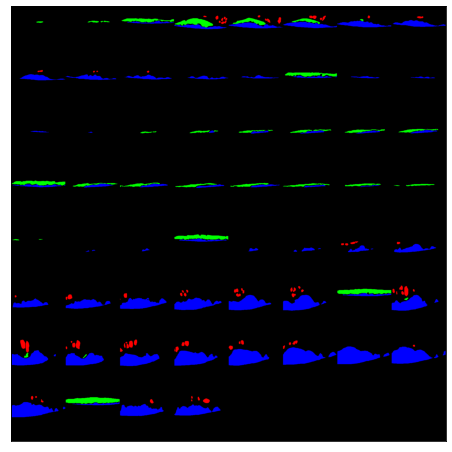

In [ ]:
show_batch(y)

In [ ]:
def to_device(data,Device):
  if isinstance(data,(list,tuple)):
    return [to_device(x, Device) for x in data]
  return data.to(Device, non_blocking=True)

class device_DataLoader():
    def __init__(self, dl, Device):
        self.dl = dl
        self.device = Device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')

else:
  device = torch.device('cpu')

device

device(type='cuda')

In [ ]:
#converting to cuda
train_X = device_DataLoader(X, device)
train_y = device_DataLoader(y, device)

#Val_X = device_DataLoader(val_X, device)
#Val_y = device_DataLoader(val_y, device)

NameError: ignored

#UNET


In [ ]:
class Unet(nn.Module):
    def __init__(self,inp_channels):
        super().__init__()
        self.d1 = nn.Sequential(nn.Conv2d(inp_channels, 64, kernel_size=4, stride=2, padding=1 ), nn.LeakyReLU(0.2))

        self.d2 = nn.Sequential(nn.Conv2d(64, 128, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))
        self.d3 = nn.Sequential(nn.Conv2d(128, 256, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))
        self.d4 = nn.Sequential(nn.Conv2d(256, 512, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))
        self.d5 = nn.Sequential(nn.Conv2d(512, 512, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))
        self.d6 = nn.Sequential(nn.Conv2d(512, 512, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))
        self.d7 = nn.Sequential(nn.Conv2d(512, 512, kernel_size = 4, stride =2, padding =1), nn.LeakyReLU(0.2))

            #bottleneck
        self.b = nn.Sequential(nn.Conv2d(512,512, kernel_size = 4, stride =2, padding =1), nn.ReLU())

            #upsampling
        self.u1 = nn.Sequential(nn.ConvTranspose2d(512,512,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(True), nn.Dropout(0.5))
        self.u2 = nn.Sequential(nn.ConvTranspose2d(1024,512,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(True), nn.Dropout(0.5))
        self.u3 = nn.Sequential(nn.ConvTranspose2d(1024,512,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(512),nn.ReLU(True), nn.Dropout(0.5))
        self.u4 = nn.Sequential(nn.ConvTranspose2d(1024,512,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(512), nn.ReLU(True))
        self.u5 = nn.Sequential(nn.ConvTranspose2d(1024,256,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(256), nn.ReLU(True))
        self.u6 = nn.Sequential(nn.ConvTranspose2d(512,128,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(128), nn.ReLU(True))
        self.u7 = nn.Sequential(nn.ConvTranspose2d(256,64,kernel_size=4,stride=2,padding=1, bias=False), nn.BatchNorm2d(64), nn.ReLU(True))
        self.u8 = nn.Sequential(nn.ConvTranspose2d(128,3,kernel_size=4,stride=2,padding=1, bias=False), nn.Sigmoid())
        
    def forward(self, X):
        d1 = self.d1(X)
        d2 = self.d2(d1)
        d3 = self.d3(d2)
        d4 = self.d4(d3)
        d5 = self.d5(d4)
        d6 = self.d6(d5)
        d7 = self.d7(d6)
        b = self.b(d7)

        u1 = self.u1(b)
        u2 = self.u2(torch.cat([u1,d7], 1))
        u3 = self.u3(torch.cat([u2,d6], 1))
        u4 = self.u4(torch.cat([u3,d5], 1))
        u5 = self.u5(torch.cat([u4,d4], 1))
        u6 = self.u6(torch.cat([u5,d3], 1))
        u7 = self.u7(torch.cat([u6,d2], 1))
        u8 = self.u8(torch.cat([u7,d1], 1))

        return u8

In [ ]:
unet = Unet(inp_channels=3).to(device)

In [ ]:
import matplotlib
def unet_Train(X,y,gen_optimizer):
  output = unet(X)
  l = nn.CrossEntropyLoss()
  target = y.long()

  target = torch.argmax(y, dim=1)
  '''nb_classes = 4 - 1 # 18 classes + background
  idx = np.linspace(0., 1., nb_classes)
  cmap = matplotlib.cm.get_cmap('viridis')
  rgb = cmap(idx, bytes=True)[:, :3]  # Remove alpha value

  h, w = 256, 256
  rgb = rgb.repeat(1000, 0)
  target = y
  target[:rgb.shape[0]] = rgb
  target = target.reshape(h, w, 3)

  plt.imshow(target) # Each class in 10 rows

  # Create mapping
  # Get color codes for dataset (maybe you would have to use more than a single
  # image, if it doesn't contain all classes)
  target = torch.from_numpy(target)
  colors = torch.unique(target.view(-1, target.size(2)), dim=0).numpy()
  target = target.permute(2, 0, 1).contiguous()

  mapping = {tuple(c): t for c, t in zip(colors.tolist(), range(len(colors)))}

  mask = torch.empty(h, w, dtype=torch.long)
  for k in mapping:
      # Get all indices for current class
      idx = (target==torch.tensor(k, dtype=torch.uint8).unsqueeze(1).unsqueeze(2))
      validx = (idx.sum(0) == 3)  # Check that all channels match
      mask[validx] = torch.tensor(mapping[k], dtype=torch.long)'''

  loss = l(output, target)
  gen_optimizer.zero_grad()
  loss.backward()
        # Update weights
  gen_optimizer.step()

  return loss.item()

In [ ]:
epochs = 100
lr = 2e-4
Lambda = 100
lossU = []

gen_optimizer = torch.optim.Adam(unet.parameters(), lr=lr)



for epoch in range(epochs):
  for _,data in enumerate(zip(train_X, train_y)):
    #print(data[1][0])
    loss_u = unet_Train(data[0][0],data[1][0],gen_optimizer)
  lossU.append(loss_u)
  print("Epoch-",epoch,"  loss: ",loss_u)

'''for epoch in range(epochs):
  for X,_ in tqdm.tqdm(train_X):
    for y,_ in tqdm.tqdm(train_y):
    #print(X.shape,y.shape)
      loss_u = unet_Train(X,y,gen_optimizer)

  lossU.append(loss_u)
  print("Epoch-",epoch,"  loss: ",loss_u)'''

Epoch- 0   loss:  1.0618736743927002
Epoch- 1   loss:  0.9873850345611572
Epoch- 2   loss:  0.9356833696365356
Epoch- 3   loss:  0.8975757360458374
Epoch- 4   loss:  0.8601701259613037
Epoch- 5   loss:  0.8295387625694275
Epoch- 6   loss:  0.8013139367103577
Epoch- 7   loss:  0.7757301330566406
Epoch- 8   loss:  0.7518354654312134
Epoch- 9   loss:  0.7312308549880981
Epoch- 10   loss:  0.7114260792732239
Epoch- 11   loss:  0.6930062174797058
Epoch- 12   loss:  0.6784688830375671
Epoch- 13   loss:  0.6641966700553894
Epoch- 14   loss:  0.6520692706108093
Epoch- 15   loss:  0.6429861783981323
Epoch- 16   loss:  0.6329990029335022
Epoch- 17   loss:  0.6249668598175049
Epoch- 18   loss:  0.6172047257423401
Epoch- 19   loss:  0.6171165108680725
Epoch- 20   loss:  0.6106922626495361
Epoch- 21   loss:  0.605184018611908
Epoch- 22   loss:  0.6014629006385803
Epoch- 23   loss:  0.5965718030929565
Epoch- 24   loss:  0.5932340025901794
Epoch- 25   loss:  0.5903651118278503
Epoch- 26   loss:  0.58

KeyboardInterrupt: ignored

In [ ]:
np.save('U_loss.npy',np.array(lossU))

#Saving trained models
torch.save(unet, "./unet.pth") 

Text(0.5, 1.0, 'Unet Loss')

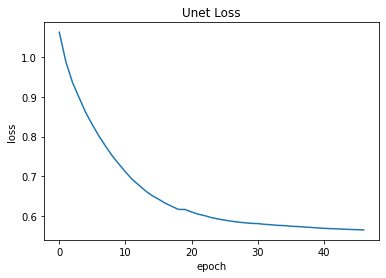

In [ ]:
plt.plot(lossU)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Unet Loss')

#Re-Exception

In [ ]:
class SeparableConv2d(nn.Module):

  def __init__(self, in_channels, out_channels, kernel_size, padding, bias=False):
      super(SeparableConv2d, self).__init__()
      self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size, 
                                groups=in_channels, bias=bias, padding=padding)
      self.pointwise = nn.Conv2d(in_channels, out_channels, 
                                kernel_size=1, bias=bias)

  def forward(self, x):
      out = self.depthwise(x)
      out = self.pointwise(out)
      return out

In [ ]:
class reXcep(nn.Module):
  def __init__(self,inp_channels):
    super().__init__()
    self.inp_channels = inp_channels

  def forward(self,inp):
    l = nn.Conv2d(self.inp_channels, 64, kernel_size=3, stride=1, bias=False, padding='same' )(inp) 
    l = nn.batchNorm2d(64)(l)
    l = nn.SiLU()(l)

    l = nn.Conv2d(64, 128, kernel_size=3, bias=False, padding='same' )(l) 
    l = nn.batchNorm2d(128)(l)
    l = nn.SiLU()(l)

    r = nn.Conv2d(128, 256, kernel_size=1, stride=2,padding='same', bias=False)(l)
    r = nn.batchNorm2d(256)(r)

    #block2
    l = SeparableConv2d(256, 256, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(256)(l)
    l = nn.SiLU()(l)

    l = SeparableConv2d(256, 256, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(256)(l)
    skip1 = l
    l = nn.MaxPool2d(3, stride=2,padding='same')(l)

    l = l+r
    r = nn.Conv2d(256, 512, kernel_size=1, stride = 2, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(512)(r)

    #Block3
    l = nn.SiLU()(l)
    l = SeparableConv2d(512, 512, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(512)(l)
    l = nn.SiLU()(l)
    l = SeparableConv2d(512, 512, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(512)(l)
    skip2 = l
    l = nn.MaxPool2d(3, stride=2,padding='same')(l)
    l = l+r

    r = nn.Conv2d(512, 1024, kernel_size=1, stride = 2, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(1024)(r)

    #Block4
    l = nn.SiLU()(l)
    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)
    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    skip3 = l
    l = nn.MaxPool2d(3, stride=2,padding='same')(l)
    l = l+r

    #Block5
    for i in range(1):
      r = l
      l = nn.SiLU()(l)
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = nn.SiLU()(l)
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = nn.SiLU()(l)
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = l+r

    #Block13
    r = nn.Conv2d(1024, 1024, kernel_size=1, stride = 2, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(1024)(r)

    l = nn.SiLU()(l)
    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)
    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    skip4 = l
    l = nn.MaxPool2d(3, stride=2,padding='same')(l)
    l = l+r

    l = SeparableConv2d(1024, 2048, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(2048)(l)
    l = nn.SiLU()(l)
    l = SeparableConv2d(2048, 4096, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(4096)(l)
    l = nn.SiLU()(l)

    #Rev Deconv
    l = SeparableConv2d(4096, 2048, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(2048)(l)
    l = nn.SiLU()(l)

    l = nn.Upsample(size=(2,2), mode="bilinear")(l)
    r = nn.Conv2d(1024, 1024, kernel_size=1, stride = 1, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(1024)(r)

    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)

    l = l+skip4

    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)
    l = l+r

    #Rev middle
    for i in range(1):
      r = l
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = nn.SiLU()(l)
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = nn.SiLU()(l)
      l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
      l = nn.batchNorm2d(1024)(l)
      l = nn.SiLU()(l)
      l = l+r

      #Block4
    l = nn.Upsample(size=(2,2), mode="bilinear")(l)

    r = nn.Conv2d(1024, 1024, kernel_size=1, stride = 1, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(1024)(r)

    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)

    l = l+skip3

    l = SeparableConv2d(1024, 1024, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(1024)(l)
    l = nn.SiLU()(l)
    l = l+r

    #Block3
    l = nn.Upsample(size=(2,2), mode="bilinear")(l)

    r = nn.Conv2d(1024, 512, kernel_size=1, stride = 1, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(512)(r)

    l = SeparableConv2d(512, 512, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(512)(l)
    l = nn.SiLU()(l)

    l = l+skip2

    l = SeparableConv2d(512, 512, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(512)(l)
    l = nn.SiLU()(l)
    l = l+r

    #Block2
    l = nn.Upsample(size=(2,2), mode="bilinear")(l)

    r = nn.Conv2d(512, 256, kernel_size=1, stride = 1, bias=False, padding='same' )(l)
    r = nn.batchNorm2d(512)(r)

    l = SeparableConv2d(256, 256, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(512)(l)
    l = nn.SiLU()(l)

    l = l+skip1

    l = SeparableConv2d(256,256, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(256)(l)
    l = nn.SiLU()(l)
    l = l+r

    #Block1
    l = nn.SiLU()(l)
    l = SeparableConv2d(256, 128, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(128)(l)
    l = nn.SiLU()(l)
    l = SeparableConv2d(128, 64, kernel_size=3, padding='same' )(l)
    l = nn.batchNorm2d(64)(l)
    l = nn.Conv2d(64, 3, kernel_size=1, padding='same')(l)
    l = nn.SiLU()(l)
    return l





In [ ]:
Xmodel = reXcep(inp_channels=3).to(device)

In [ ]:
device

device(type='cuda')

In [ ]:
from torchsummary import summary

#vgg = models.vgg16()
summary(Xmodel, (3, 256, 512))


RuntimeError: ignored

In [ ]:
def train(X,y,optimizer,mod):
  output = mod(X)
  l = nn.CrossEntropyLoss()
  loss = l(output,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  return loss.item() 
  

In [ ]:
lr = 3e-4
print(Xmodel.parameters())
optim = torch.optim.Adam(Xmodel.parameters(), lr = lr, betas =(0.5, 0.999))
epochs = 20
Xloss = []
for i in range(epochs):
  for _,data in enumerate(zip(train_X, train_y)):
    #print(data[1][0])
    loss = disc_train(data[0][0], data[1][0], optim, Xmodel)
  Xloss.append(loss)
  #Acc.append(accuracy)
  print("Epoch-",epoch," loss: ",loss_g)

<generator object Module.parameters at 0x7fbd5a2a1bd0>


ValueError: ignored

In [ ]:
#lr = 3e-4, loss=categorical_crossentropy,

# Training Functions

In [ ]:
def disc_train(X, y, disc_optimizer, disc_model, gen_model):
  
  #loss from discriminator
  imput = torch.cat([X,y], dim=1)
  #print(imput.shape)
  d_output = disc_model(imput.detach())
  d_target = torch.ones(d_output.size(0), 1, 30, 30).to(device)
  bce = nn.BCELoss()
  d_loss = bce(d_output, d_target)

  #loss from generator
  gen_images = gen_model(X)
  imput2 = torch.cat([X,gen_images], dim=1)
  g_output = disc_model(imput2.detach())
  g_target = torch.zeros(d_output.size(0), 1, 30, 30).to(device)
  g_loss = bce(g_output, g_target)
  loss = (d_loss + g_loss)/2


  disc_optimizer.zero_grad()
  loss.backward()
  disc_optimizer.step()
  
  return loss.item() 

In [ ]:
def gen_train(gen_optimizer, gen_model,X,y, Lambda):
  
  gen_images = gen_model(X)
  imput = torch.cat([X,gen_images], dim=1)
  
  output = disc_model(imput.detach())
  target = torch.ones(output.size(0), 1, 30, 30).to(device)
  bce = nn.BCELoss()
  g_loss = bce(output, target)
  L1 = nn.L1Loss()
  l1 = L1(gen_images,y)*Lambda
  
  loss = g_loss+l1
  
  gen_optimizer.zero_grad()
  loss.backward()
  gen_optimizer.step()
  
 # _, tags = torch.max(gen_images, dim = 1)
  #print(tags.shape,y.shape)
  compa = np.equal(gen_images.cpu().detach(), y.cpu().numpy())
  #print(compa)
  accuracy = np.sum(compa.numpy())

  acc = accuracy/len(gen_images.flatten())

  '''corrects = (gen_images == y).float()
  acc = corrects.sum() / (256*256*3*60)
  acc = acc * 100'''
  return acc, loss.item()

# Training

In [ ]:
!ls

CGan_disc.pth  CGan_gen.pth  D_loss.npy  Gen  Gen2  GenTemp  G_loss.npy  x  y


In [ ]:
#gen_model = gen(inp_channels=3).to(device)
gen_model = UnetGenerator(input_nc=3, output_nc=3).to(device)
disc_model = Discriminator(input_nc=6).to(device)
#disc_model = disc(inp_channels=6).to(device)
#gen_model = to_device(gen_model, device)
#disc_model = to_device(disc_model, device)

In [ ]:
gen_model = torch.load('./CGan_gen_final2.pth')
disc_model = torch.load('./CGan_disc_final2.pth')

In [ ]:
lossD = list(np.load('D_lossF2.npy'))
lossG = list(np.load('G_lossF2.npy'))
#Val_lossD = list(np.load('D_Val_lossF.npy'))
#Val_lossG = list(np.load('G_Val_lossF.npy'))
#lossD=lossD[61:]
#lossG=lossG[61:]

In [ ]:
lossD = []
lossG = []
Val_lossD = []
Val_lossG = []

In [ ]:
from torchsummary import summary

#vgg = models.vgg16()
summary(disc_model, (6, 256, 512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 256]           6,208
         LeakyReLU-2         [-1, 64, 128, 256]               0
            Conv2d-3         [-1, 128, 64, 128]         131,072
       BatchNorm2d-4         [-1, 128, 64, 128]             256
         LeakyReLU-5         [-1, 128, 64, 128]               0
            Conv2d-6          [-1, 256, 32, 64]         524,288
       BatchNorm2d-7          [-1, 256, 32, 64]             512
         LeakyReLU-8          [-1, 256, 32, 64]               0
            Conv2d-9          [-1, 512, 31, 63]       2,097,152
      BatchNorm2d-10          [-1, 512, 31, 63]           1,024
        LeakyReLU-11          [-1, 512, 31, 63]               0
           Conv2d-12            [-1, 1, 30, 62]           8,193
          Sigmoid-13            [-1, 1, 30, 62]               0
Total params: 2,768,705
Trainable param

In [ ]:
adversarial_loss = nn.BCELoss() 
l1_loss = nn.L1Loss()

In [ ]:
def generator_loss(generated_image, target_img, G, real_target):
    gen_loss = adversarial_loss(G, real_target)
    l1_l = l1_loss(generated_image, target_img)
    gen_total_loss = gen_loss + (100 * l1_l)
    #print(gen_loss)
    return gen_total_loss

In [ ]:
def discriminator_loss(output, label):
    disc_loss = adversarial_loss(output, label)
    return disc_loss

In [ ]:
diceC = []

In [ ]:
def dice_coef(y_true, y_pred):
    
    y_pred = torch.round(y_pred)
    y_true_f = torch.flatten(y_true)
    y_pred_f = torch.flatten(y_pred)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + 1)

In [ ]:
num_epochs = 100
D_loss_plot, G_loss_plot = lossD,lossG
#D_val_loss_plot, G_val_loss_plot = Val_lossD, Val_lossG
G_optimizer = torch.optim.Adam(gen_model.parameters(), lr = 0.0002, betas =(0.5, 0.999))
D_optimizer = torch.optim.Adam(disc_model.parameters(), lr = 0.0002, betas =(0.5, 0.999))
step = 0
for epoch in range(1, num_epochs+1): 
  

    D_loss_list, G_loss_list = [],[]
    DiceC = []
    #D_val_loss_list, G_val_loss_list = [],[]
   
    for _,data in enumerate(zip(train_X, train_y)):
        #input_img,target_img, val_inp, val_target = data
        input_img,target_img = data
        D_optimizer.zero_grad()
        input_img = input_img[0].to(device)
        target_img = target_img[0].to(device)
        #val_inp = val_inp[0].to(device)
        #val_target = val_target[0].to(device)

        # ground truth labels real and fake
        real_target = torch.ones(input_img.size(0), 1, 30, 30).to(device)
        fake_target = torch.zeros(input_img.size(0), 1, 30, 30).to(device)

        #real_target = torch.ones(input_img.size(0), 1).to(device)
        #fake_target = torch.zeros(input_img.size(0), 1).to(device)
        
        # generator forward pass
        generated_image = gen_model(input_img)
        #val_gen = gen_model(val_inp)
        
        # train discriminator with fake/generated images
        disc_inp_fake = torch.cat((input_img, generated_image), 1)
        #disc_inp_Val_fake = torch.cat((val_inp, val_gen), 1)
        
        D_fake = disc_model(disc_inp_fake.detach())
        #D_val_fake = disc_model(disc_inp_Val_fake.detach())
        
        D_fake_loss   =  discriminator_loss(D_fake, fake_target)
        #D_fake_val_loss   =  discriminator_loss(D_val_fake, fake_target)
        
        # train discriminator with real images
        disc_inp_real = torch.cat((input_img, target_img), 1)
        #disc_inp_val_real = torch.cat((val_inp, val_target), 1)
                                
        D_real = disc_model(disc_inp_real)
        #D_val_real = disc_model(disc_inp_val_real)
        D_real_loss = discriminator_loss(D_real,  real_target)
        #D_real_val_loss = discriminator_loss(D_val_real,  real_target)
        DiceC.append(dice_coef(denorm(target_img),denorm(generated_image)))
    
        
        # average discriminator loss
        D_total_loss = (D_real_loss + D_fake_loss) / 2
        #D_total_val_loss = (D_real_val_loss + D_fake_val_loss) / 2
        D_loss_list.append(D_total_loss.item())
        #D_val_loss_list.append(D_total_val_loss.item())
        # compute gradients and run optimizer step
        D_total_loss.backward()
        D_optimizer.step()
        
        
        # Train generator with real labels
        G_optimizer.zero_grad()
        fake_gen = torch.cat((input_img, generated_image), 1)
        #fake_val_gen = torch.cat((val_inp, val_gen), 1)
        G = disc_model(fake_gen)
        #G_val = disc_model(fake_val_gen)
        G_loss = generator_loss(generated_image, target_img, G, real_target)
        #G_val_loss = generator_loss(val_gen, val_target, G_val, real_target)                                 
        G_loss_list.append(G_loss.item())
        #G_val_loss_list.append(G_val_loss.item())
        # compute gradients and run optimizer step
        G_loss.backward()
        G_optimizer.step()
        '''step += 1
        print(step)'''
          
    temp = []
    for i in DiceC:
      temp.append(i.cpu().detach())
    diceC.append(np.mean(temp))
    print("Epoch: ", epoch, "GLoss: ",G_loss_list[-1], "\t DiceC: ",diceC[-1])
    D_loss_plot.append(D_loss_list[-1])
    G_loss_plot.append(G_loss_list[-1])
    #D_val_loss_plot.append(D_val_loss_list[-1])
    #G_val_loss_plot.append(G_val_loss_list[-1])

Epoch:  1 GLoss:  48.44182586669922 	 DiceC:  0.055188134
Epoch:  2 GLoss:  34.6325798034668 	 DiceC:  0.057459693
Epoch:  3 GLoss:  26.69822120666504 	 DiceC:  0.04869614
Epoch:  4 GLoss:  21.329057693481445 	 DiceC:  0.047535628
Epoch:  5 GLoss:  17.95313835144043 	 DiceC:  0.05797371
Epoch:  6 GLoss:  14.80742073059082 	 DiceC:  0.0854356
Epoch:  7 GLoss:  9.242080688476562 	 DiceC:  0.1510223
Epoch:  8 GLoss:  10.305469512939453 	 DiceC:  0.18433577
Epoch:  9 GLoss:  8.273907661437988 	 DiceC:  0.1071336
Epoch:  10 GLoss:  9.054309844970703 	 DiceC:  0.0157776
Epoch:  11 GLoss:  9.06416130065918 	 DiceC:  0.03143764
Epoch:  12 GLoss:  9.091255187988281 	 DiceC:  0.023731844
Epoch:  13 GLoss:  10.07012939453125 	 DiceC:  0.021806424
Epoch:  14 GLoss:  10.502006530761719 	 DiceC:  0.00031425836
Epoch:  15 GLoss:  10.58218002319336 	 DiceC:  0.0035100847
Epoch:  16 GLoss:  11.01133918762207 	 DiceC:  0.05871582
Epoch:  17 GLoss:  11.297794342041016 	 DiceC:  0.11973555
Epoch:  18 GLos

KeyboardInterrupt: ignored

# Results

In [ ]:
np.save('D_lossT.npy',np.array(D_loss_plot))
np.save('G_lossT.npy',np.array(G_loss_plot))
#np.save('D_Val_lossF2.npy',np.array(D_val_loss_plot))
#np.save('G_Val_lossF2.npy',np.array(G_val_loss_plot))
np.save('DiceT.npy',np.array(temp))

#Saving trained models
torch.save(gen_model, "./CGan_genT.pth") 
torch.save(disc_model, "./CGan_discT.pth")

In [ ]:
temp = list(np.load('DiceT.npy'))
#temp = []
for i in diceC:
  temp.append(i) 

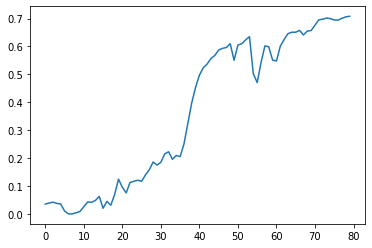

In [ ]:
plt.plot(temp)

Text(0.5, 1.0, 'Losses')

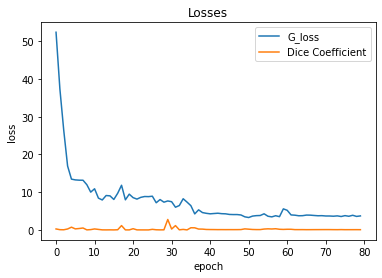

In [ ]:
plt.plot(G_loss_plot, '-')
plt.plot(D_loss_plot, '-')
#plt.plot(lossU)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['G_loss', 'Dice Coefficient'])
plt.title('Losses')

In [ ]:
np.save('DiceCir.npy',temp)

Text(0.5, 1.0, 'Losses')

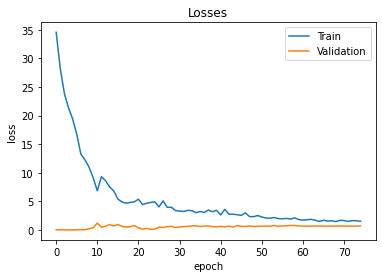

In [ ]:
plt.plot(lossG, '-')
plt.plot(lossD, '-')
#plt.plot(lossU)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.title('Losses')

# Generating from scans

In [ ]:
gen_model = torch.load('./CGan_gen.pth') #Loading saved model

In [ ]:
'''test_sketches = ImageFolder('./Images/ValX_images',transform=transforms.Compose([
                                                          transforms.Resize(image_size),
                                                          transforms.CenterCrop(image_size),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)]))'''

test_scans = ImageFolder('./Images/ValX_images',transform=transforms.ToTensor())

test = DataLoader(test_scans, batch_size=2,shuffle=False,num_workers=2, )
test = device_DataLoader(test, device)


In [ ]:
Xcir = ImageFolder('./x/cir', transform=transforms.Compose([
                                                            
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Xspe = ImageFolder('./x/spe', transform=transforms.Compose([ 
                                                            
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Xtop = ImageFolder('./x/top', transform=transforms.Compose([
                                                          
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))

In [ ]:
#print(len(Xcir), len(Xspe), len(Xtop))
t_indices = np.array(range(300,310))
#t_indices.shape

Xcir = torch.utils.data.Subset(Xcir, t_indices)
Xspe = torch.utils.data.Subset(Xspe, t_indices)
Xtop = torch.utils.data.Subset(Xtop, t_indices)
test = torch.utils.data.ConcatDataset([Xcir,Xspe,Xtop])
#len(test)
test = DataLoader(test, batch_size=1,shuffle=False,num_workers=2, )
test = device_DataLoader(test, device)

In [ ]:
Ycir = ImageFolder('./y/cir', transform=transforms.Compose([
                                                            
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Yspe = ImageFolder('./y/spe', transform=transforms.Compose([ 
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))
Ytop = ImageFolder('./y/top', transform=transforms.Compose([
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(*norm_vals)
                                                          ]))


In [ ]:
#print(len(Ycir), len(Yspe), len(Ytop))
#t1_indices = np.array(range(300,600))
t1_indices = np.array(range(800,820))
#t_indices.shape
Ycir = torch.utils.data.Subset(Ycir, t_indices)
Yspe = torch.utils.data.Subset(Yspe, t_indices)
Ytop = torch.utils.data.Subset(Ytop, t_indices)
target = torch.utils.data.ConcatDataset([Ycir,Yspe,Ytop])

#print(target)
target = DataLoader(target, batch_size=1,shuffle=False,num_workers=2, )
target = device_DataLoader(target, device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


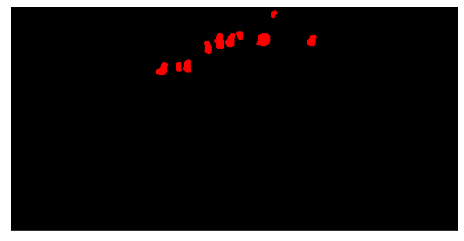

In [ ]:
show_batch(target)

In [ ]:
def dice_coef(y_true, y_pred):
    
    y_pred = torch.round(y_pred)
    y_true_f = torch.flatten(y_true)
    y_pred_f = torch.flatten(y_pred)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + 1)

In [ ]:
SMOOTH = 1e-6

def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1)  # BATCH x 1 x H x W => BATCH x H x W
    
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
    return thresholded

In [ ]:
diceC = []
IoU = []

In [ ]:
sample_dir = 'Output_Gen4'
os.makedirs(sample_dir, exist_ok=True)


def save_samples(index, latent_tensors,y, show=True):
    #temp = gen_model(latent_tensors)
    fake_images = gen_model(latent_tensors)
    #target = torch.argmax(target, dim=1)
    #fake_images = unet(latent_tensors)
    #fake_images = fake_images.round()
    flag = 0
    
    #for i in range(len(fake_images)):
    diceC.append(dice_coef(denorm(y),denorm(fake_images)))
    '''  
      for j in range(len(fake_images[i])):
        for k in range(len(fake_images[i][j])):
          for l in range(len(fake_images[i][j][k])):
            fake_images[i][2][k][l] = 0
            if fake_images[i][j][k][l] != 0:
              y[i][i][k][l] *= 255
            #print(fake_images[i][j][k][l])
            
              #flag = 1
          #for i in range(len(fake_images)):
      
    print("Dice: ",diceC[0]*100)
    if flag == 1:
        print("YESSSSS")
        print(fake_images) '''
    '''mean = np.mean(fake_images.cpu().detach().numpy())
    std = np.std(fake_images.cpu().detach().numpy())
    fake_images = fake_images - mean
    fake_images /= std'''
    fake_fname = 'S2F-{0:0=4d}.png'.format(index)
    #print(fake_images[0,1,:,:].cpu().detach())
    #plt.imshow(fake_images[0,:,:].cpu().detach(), cmap='gray')
    final = torch.cat([denorm(latent_tensors),denorm(fake_images.detach()),denorm(y)],-1)
    save_image(final, os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(final.cpu().detach(), nrow=8).permute(1, 2, 0))

Saving S2F-0000.png
Saving S2F-0001.png
Saving S2F-0002.png
Saving S2F-0003.png
Saving S2F-0004.png
Saving S2F-0005.png
Saving S2F-0006.png
Saving S2F-0007.png
Saving S2F-0008.png
Saving S2F-0009.png
Saving S2F-0010.png
Saving S2F-0011.png
Saving S2F-0012.png
Saving S2F-0013.png
Saving S2F-0014.png
Saving S2F-0015.png
Saving S2F-0016.png
Saving S2F-0017.png
Saving S2F-0018.png
Saving S2F-0019.png
Saving S2F-0020.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Saving S2F-0021.png
Saving S2F-0022.png
Saving S2F-0023.png
Saving S2F-0024.png
Saving S2F-0025.png
Saving S2F-0026.png
Saving S2F-0027.png
Saving S2F-0028.png
Saving S2F-0029.png


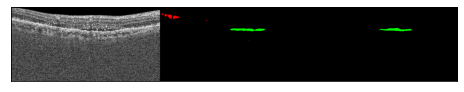

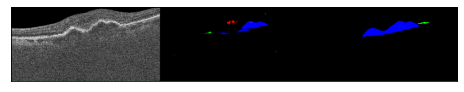

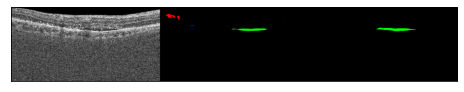

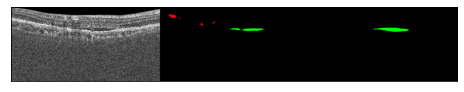

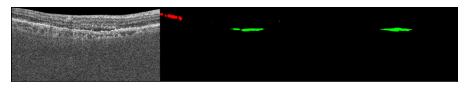

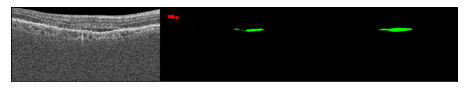

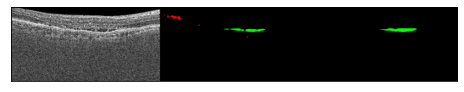

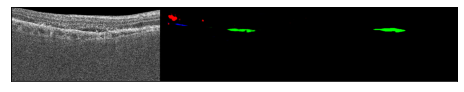

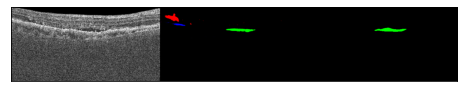

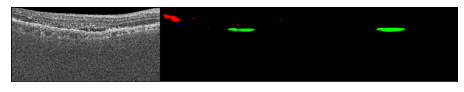

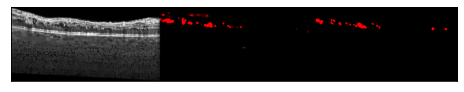

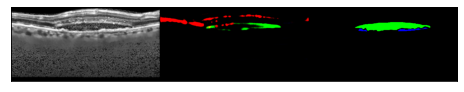

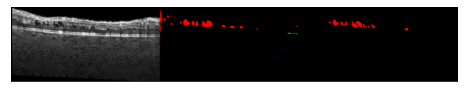

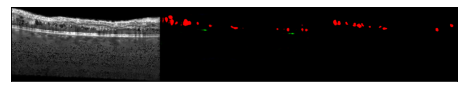

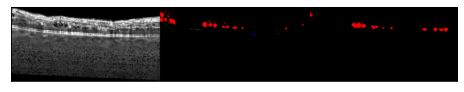

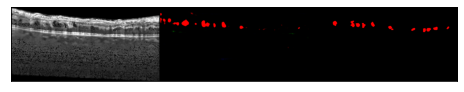

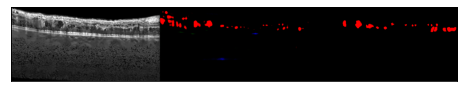

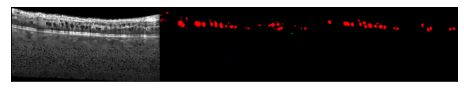

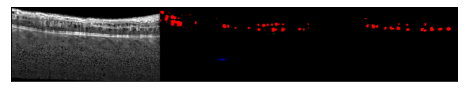

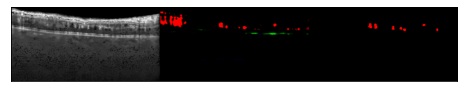

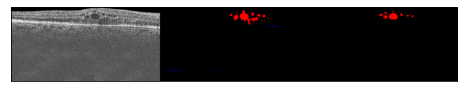

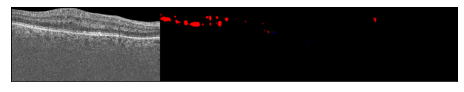

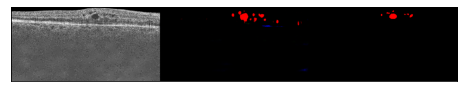

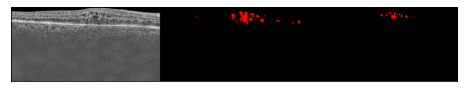

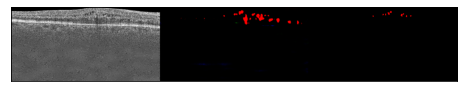

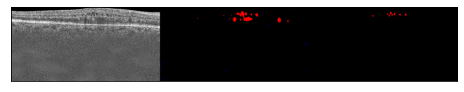

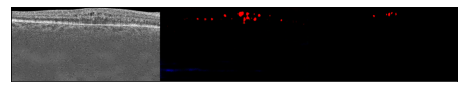

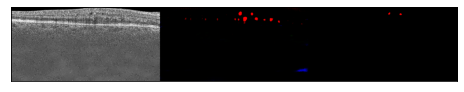

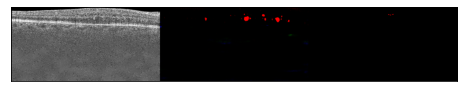

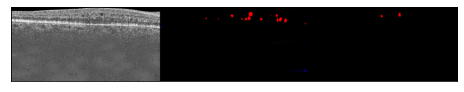

In [ ]:
diceC = []
dice = 0
i =0
for _,data in enumerate(zip(test,target)):
      
    save_samples(i,data[0][0],data[1][0])
    i+=1
    if i==30:
      break
    #diceC.append(dice)

In [ ]:
temp2 = []
for i in diceC:
  temp2.append(i.cpu().detach())
np.mean(temp2)

0.4423261

In [ ]:
diceC

[tensor(0.6602, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5658, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.6189, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5499, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5784, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5036, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.6271, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5788, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5484, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5575, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5890, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.2824, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.6022, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.4276, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.4634, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.5129, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.4188, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.6744

In [ ]:
# When trained in 300, 300 ,300 after 75 epochs
# Cir - 25%
# Spe - 42.7%
# Top - 30%

#On training set 82%

#When trained in 350, 300, 350
# Cir - 25%
# Spe - 42.7%
# Top - 57.4%

In [ ]:
test_X = np.load('Temporary/test_X.npy')
test_X = test_X.astype('float32')
#valx = valx.astype('float32')
#valgt = valgt.astype('float32')

print (test_X.shape)


# In[6]:

mean = np.mean(test_X)
std = np.std(test_X)
print (mean, std)

#print (np.mean(train_X), np.std(train_X))
#print (np.mean(valx), np.std(valx))

# In[7]:



test_X -= mean
test_X /= std

(244, 256, 512, 3)
86.99851 48.444202


In [ ]:
test_X = MyDataset(test_X)
test = DataLoader(test_X, batch_size=2,shuffle=False,num_workers=2, )
test = device_DataLoader(test, device)

## Generating and saving the images

In [ ]:
torch.save(gen_model, "./CGan_gen.pth") 
#torch.save(disc_model, "./CGan_disc.pth")

In [ ]:
(256*512*4*64*32)/2**20

1024.0